In [1]:
import pandas as pd
import matplotlib.pyplot as plt


def get_max_close(symbol):
    """ Return the maximum closing values for stock indicated by symbol

    Note: Data for a stock is stored in file : data/<symbol>.csv
    """
    df = pd.read_csv("~Deepak/AlphaX/{}.csv".format(symbol))  # read in data
    return df['Close'].max()  # compute and return max


def get_mean_volume(symbol):

    df = pd.read_csv("~Deepak/AlphaX/{}.csv".format(symbol))  # read in data
    return df['Volume'].mean()  # compute and return average


def plotchart(symbol):

    df = pd.read_csv("~Deepak/AlphaX/{}.csv".format(symbol))  # read in data
    df['Close'].plot()  # plot chart
    plt.show()

# def create_dataframe():
#     start_date = '2017-01-22'
#     end_date = '2018-01-22'
#     dates = pd.date_range(start_date,end_date)
#     df1 = pd.DataFrame(index=dates)


def test_run():
    # Define date range

    start_date = '2017-01-22'
    end_date = '2018-01-22'
    dates = pd.date_range(start_date, end_date)

    # Create an empty DataFrame
    df1 = pd.DataFrame(index=dates)

    # Read sbin data into temporary dataframe
    df_sbin = pd.read_csv("~Deepak/AlphaX/sbin.csv", index_col="Date",
                          parse_dates=True, usecols=['Date', 'Close'],
                          na_values=['nan'])
    # Rename 'Close' column to 'sbi' to prevent clash
    df_sbin = df_sbin.rename(columns={'Close': 'sbin'})

    # Join the two dataframes using DataFrame .join(),  with how = 'inner'
    df1 = df1.join(df_sbin, how='inner')

    # Read in more stocks
    symbols = ['kotakbank', 'nifty50']
    for symbol in symbols:
        df_temp = pd.read_csv("~Deepak/AlphaX/{}.csv".format(symbol), index_col="Date",
                              parse_dates=True, usecols=['Date', 'Close'],
                              na_values=['nan'])

        # Rename to prevent clash
        df_temp = df_temp.rename(columns={'Close': symbol})
        df1 = df1.join(df_temp)  # use default how ='left'

    print(df1.head())

#     """Function called by Test Run."""
#     for symbol in ['sbin', 'kotakbank']:
#         print("Max Close")
#         print(symbol, get_max_close(symbol))
#         print("Mean Volume")
#         print(symbol, get_mean_volume(symbol))
#         print(plotchart(symbol))


if __name__ == "__main__":

    test_run()

              sbin  kotakbank  nifty50
2017-01-23  254.15     732.75  8391.50
2017-01-24  254.90     743.35  8475.80
2017-01-25  259.20     795.20  8602.75
2017-01-27  266.45     785.05  8641.25
2017-01-30  263.95     775.60  8632.75


In [15]:
import pandas as pd
import os


def test_run():
    # Define date range

    start_date = '2017-01-22'
    end_date = '2018-01-22'
    dates = pd.date_range(start_date, end_date)

    # Create an empty DataFrame
    df1 = pd.DataFrame(index=dates)

    # Read sbin data into temporary dataframe
    df_sbin = pd.read_csv("~Deepak/udacity/sbin.csv", index_col="Date",
                          parse_dates=True, usecols=['Date', 'Close'],
                          na_values=['nan'])

    # Rename 'Close' column to 'sbi' to prevent clash
    df_sbin = df_sbin.rename(columns={'Close': 'sbin'})

    # Join the two dataframes using DataFrame .join(),  with how = 'inner'
    df1 = df1.join(df_sbin, how='inner')

    # Read in more stocks
    symbols = ['kotakbank', 'nifty50']
    for symbol in symbols:
        df_temp = pd.read_csv("~Deepak/udacity/{}.csv".format(symbol), index_col="Date",
                              parse_dates=True, usecols=['Date', 'Close'],
                              na_values=['nan'])

        # Rename to prevent clash
        df_temp = df_temp.rename(columns={'Close': symbol})
        df1 = df1.join(df_temp)  # use default how ='left'

    print(df1.head())

#     """Function called by Test Run."""
#     for symbol in ['sbin', 'kotakbank']:
#         print("Max Close")
#         print(symbol, get_max_close(symbol))
#         print("Mean Volume")
#         print(symbol, get_mean_volume(symbol))
#         print(plotchart(symbol))

if __name__ == "__main__":

    test_run()

              sbin  kotakbank  nifty50
2017-01-23  254.15     732.75  8391.50
2017-01-24  254.90     743.35  8475.80
2017-01-25  259.20     795.20  8602.75
2017-01-27  266.45     785.05  8641.25
2017-01-30  263.95     775.60  8632.75


In [28]:
"""Importing data from quandl into excel"""
import os
import pandas as pd
import quandl  # importing the quandl for stock price
from datetime import date

token = 'aQHZz7rEw1hVor7wGXQ7' 
def symbol_to_path(symbol, bas_dir="~Deepak/udacity"):
    """ Return CSV file path given ticker symbol."""
    return os.path.join(bas_dir, "{}.csv".format(str(symbol)))


def get_data_from_quandl():
    symbols = ['infy','tcs','reliance','bajfinance']
    start_date = "2017-01-01"
    end_date = "2020-02-03"
    token = 'aQHZz7rEw1hVor7wGXQ7'
    for symbol in symbols:
        data = quandl.get("NSE/{}".format(str(symbol)), start_date=start_date,
                            end_date=end_date, authtoken=token)
        #data.to_csv("~Deepak/udacity/{}.csv".format(symbol))
        data.to_csv(symbol_to_path(symbol))

if __name__ == "__main__":
    get_data_from_quandl()

              sbin      tcs
2018-01-24  329.90  3174.60
2018-01-25  313.15  3121.05
2018-01-29  312.10  3198.85
2018-01-30  313.55  3152.85
2018-01-31  313.25  3112.35


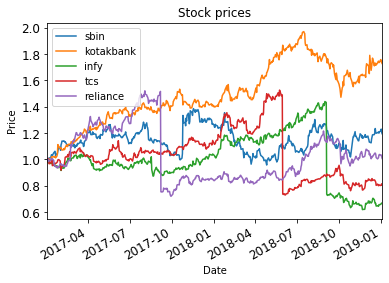

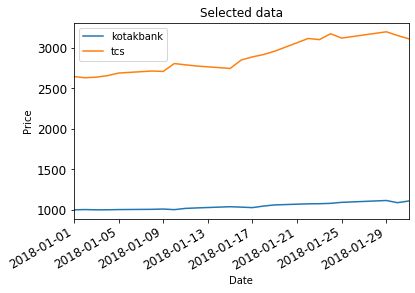

sbin          243.60
kotakbank     714.80
infy         1001.10
tcs          2361.35
reliance     1085.10
Name: 2017-01-02 00:00:00, dtype: float64


In [22]:
"""Utility functions"""

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_selected(df, columns, start_date, end_date):
    """ Plot the desired columns over index values in the given range.abs"""
    plot_data(df.loc[start_date: end_date, columns], title="Selected data")


def symbol_to_path(symbol, bas_dir="~Deepak/udacity"):
    """ Return CSV file path given ticker symbol."""
    return os.path.join(bas_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'sbin' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'sbin')

    for symbol in symbols:
        # TODO: Read a.nd join data for each symbol
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col="Date",
                              parse_dates=True, usecols=['Date', 'Close'],
                              na_values=['nan'])

        # Rename to prevent clash
        df_temp = df_temp.rename(columns={'Close': symbol})
        df = df.join(df_temp)  # use default how ='left'
        if(symbol == 'sbin'):  # drop dates sbin did not trade
            df = df.dropna(subset=["sbin"])

    return df

def normalize_data(df):
    """:Normalize stock prices using the first nrow of the dataframe."""
    return df/df.iloc[0,:]

def plot_data(df, title="Stock prices"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()


def test_run():
    # Define a date range
    start_date = "2017-01-01"
    end_date = "2020-02-03"
    dates = pd.date_range(start_date, end_date)

    # Choose stock symbols to read
    symbols = ['kotakbank', 'infy', 'tcs', 'reliance']

    # Get stock data
    df = get_data(symbols, dates)
    # print(df.loc['2018-01-01':'2018-01-31']) #Slice by row range
    # print(df[['sbin','kotakbank']]) #slice by columns names
    # slice with row and columns
    print(df.loc['2018-01-01':'2018-01-31', ['sbin', 'tcs']].tail())
    plot_data(normalize_data(df))
    plot_selected(df, ['kotakbank', 'tcs'], '2018-01-01', '2018-01-31')
    

if __name__ == "__main__":
    test_run()